[nltk_data] Downloading package punkt to /home/iiit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/iiit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/iiit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



[Exploratory Data Analysis on User Input]
Number of Sentences: 23
Number of Words: 522

[Exploratory Data Analysis on Generated Keywords]
Number of Topics: 5
Total Number of Keywords: 25
Number of Unique Keywords: 10


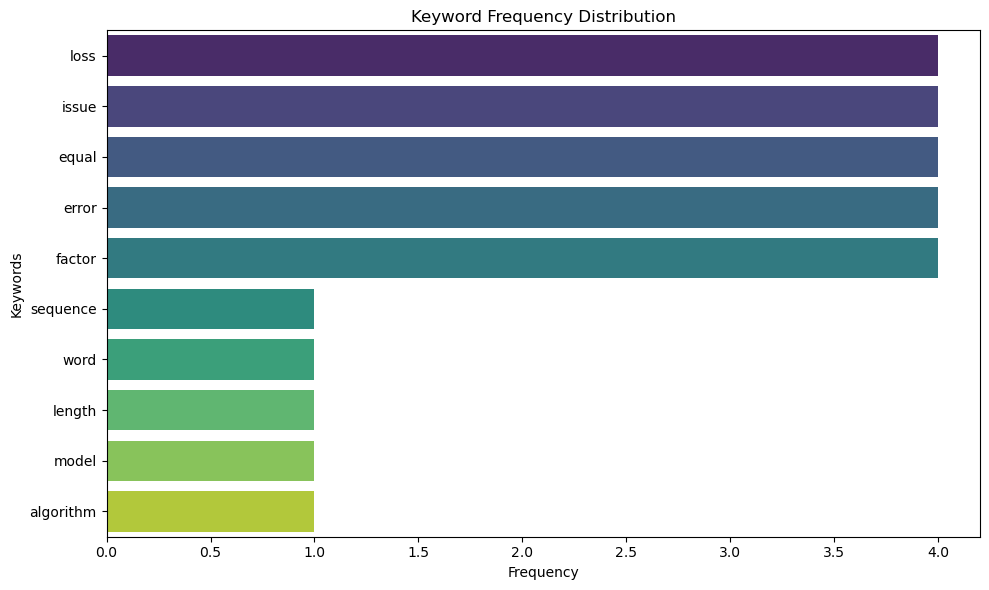


Results saved to lda_results.csv


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources (needed for stopwords and lemmatization)
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Function to preprocess text
def preprocess_text(text):
    # Tokenize text into words
    words = word_tokenize(text)
    
    # Convert to lowercase and remove punctuation
    words = [word.lower() for word in words if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(words)

# Function to perform LDA topic modeling
def perform_lda(text, num_topics):
    # Preprocess the text
    preprocessed_text = preprocess_text(text)
    
    # Create a document-term matrix using CountVectorizer
    vectorizer = CountVectorizer(min_df=1, max_df=1.0)  # Adjust min_df and max_df values to control redundancy
    dtm = vectorizer.fit_transform([preprocessed_text])
    
    # Apply LDA with the specified number of topics
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(dtm)
    
    # Get the most significant words and their probability scores for each topic
    feature_names = vectorizer.get_feature_names_out()
    topics_keywords = []
    for topic_idx, topic in enumerate(lda_model.components_):
        topic_keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
        topic_prob_scores = [round(topic[i], 2) for i in topic.argsort()[:-6:-1]]
        topics_keywords.append((topic_idx, topic_keywords, topic_prob_scores))
    
    return topics_keywords, preprocessed_text

# Read user input dynamically
user_input = input("Enter your text passage or paragraph: ")

# Perform EDA on user input
num_sentences = len(nltk.sent_tokenize(user_input))
num_words = len(word_tokenize(user_input))

print("\n[Exploratory Data Analysis on User Input]")
print(f"Number of Sentences: {num_sentences}")
print(f"Number of Words: {num_words}")

# Dynamically adjust the number of topics as needed
num_topics = min(5, len(word_tokenize(user_input)))

# Identify keywords using LDA topic modeling
topics_keywords, preprocessed_text = perform_lda(user_input, num_topics)

# Perform EDA on generated keywords
num_keywords = sum(len(keywords) for _, keywords, _ in topics_keywords)
unique_keywords = set(keyword for _, keywords, _ in topics_keywords for keyword in keywords)

print("\n[Exploratory Data Analysis on Generated Keywords]")
print(f"Number of Topics: {len(topics_keywords)}")
print(f"Total Number of Keywords: {num_keywords}")
print(f"Number of Unique Keywords: {len(unique_keywords)}")

# Visual EDA - Bar plot of keyword frequency
keyword_freq = {keyword: 0 for _, keywords, _ in topics_keywords for keyword in keywords}
for _, keywords, _ in topics_keywords:
    for keyword in keywords:
        keyword_freq[keyword] += 1

plt.figure(figsize=(10, 6))
sns.barplot(x=list(keyword_freq.values()), y=list(keyword_freq.keys()), palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("Keywords")
plt.title("Keyword Frequency Distribution")
plt.tight_layout()
plt.show()

# Save the results to a CSV file
csv_file = "lda_results.csv"
with open(csv_file, mode='w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Topic ID", "Keywords", "Probability Scores"])
    for topic_idx, keywords, prob_scores in topics_keywords:
        writer.writerow([topic_idx, ", ".join(keywords), ", ".join(map(str, prob_scores))])

print("\nResults saved to lda_results.csv")
